In [1]:
#dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# World Happiness Report Analysis

In [2]:
#create a dataframe from a file using pandas
file = 'Resources/WorldHappinessReport.csv'
# The correct encoding must be used to read the CSV in pandas
RawData = pd.read_csv(file)
WHR_DF=RawData.loc[RawData["year"]==2017,:]
WHR_DF.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

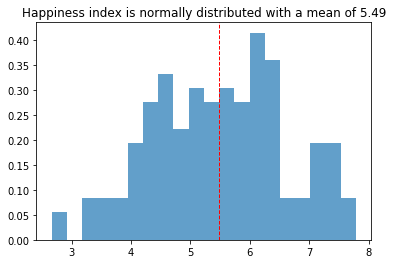

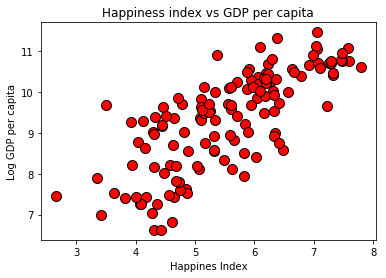

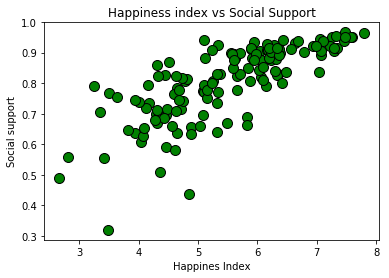

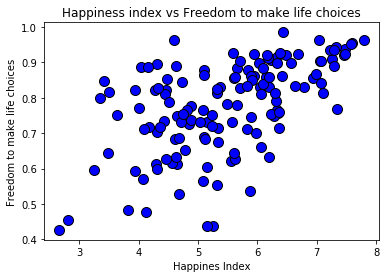

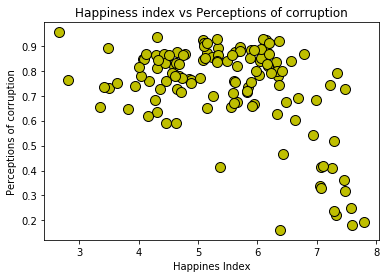

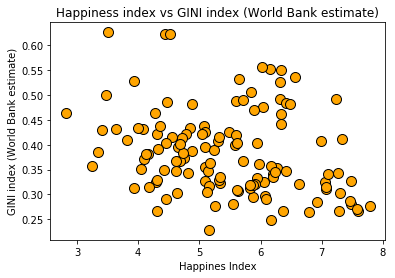

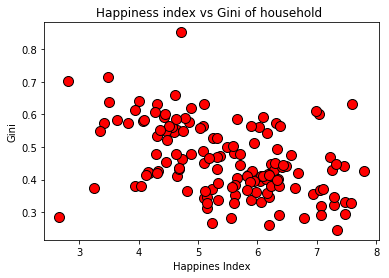

In [3]:
#Histogram of happines index

mean=WHR_DF['Life Ladder'].mean()
mean=str(round(mean, 2))

plt.hist(WHR_DF['Life Ladder'], 20, density=True, alpha=0.7, label="Happiness Index")
plt.axvline(WHR_DF['Life Ladder'].mean(), color='r', linestyle='dashed', linewidth=1)

plt.title("Happiness index is normally distributed with a mean of " + str(mean) )


#save the image in the folder
plt.savefig("Graphs/HappinessHistogram.png")
plt.show()

#GDP
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["Log GDP per capita"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('Log GDP per capita')
plt.xlabel('Happines Index')
plt.title("Happiness index vs GDP per capita")


#save the image in the folder
plt.savefig("Graphs/HappinessVsGDP.png")
plt.show()


#social suport
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["Social support"],  fmt="o",color= 'g'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('Social support')
plt.xlabel('Happines Index')
plt.title("Happiness index vs Social Support")
#save the image in the folder
plt.savefig("Graphs/HappinessVsSocilaSupport.png")
plt.show()


#Freedom to make life choices
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["Freedom to make life choices"],  fmt="o",color= 'b'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('Freedom to make life choices')
plt.xlabel('Happines Index')
plt.title("Happiness index vs Freedom to make life choices")
#save the image in the folder
plt.savefig("Graphs/HappinessVsLifeChoices.png")
plt.show()


#Freedom to make life choices
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["Perceptions of corruption"],  fmt="o",color= 'y'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('Perceptions of corruption')
plt.xlabel('Happines Index')
plt.title("Happiness index vs Perceptions of corruption")
#save the image in the folder
plt.savefig("Graphs/HappinessVsCorruption.png")
plt.show()


#GINI index (World Bank estimate)
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["GINI index (World Bank estimate), average 2000-15"],  fmt="o",color= 'orange'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('GINI index (World Bank estimate)')
plt.xlabel('Happines Index')
plt.title("Happiness index vs GINI index (World Bank estimate)")
#save the image in the folder
plt.savefig("Graphs/HappinessVsCountryPoverty.png")
plt.show()


#GDP
fig,    ax = plt.subplots() 
ax.errorbar(WHR_DF['Life Ladder'], WHR_DF["gini of household income reported in Gallup, by wp5-year"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.ylabel('Gini')
plt.xlabel('Happines Index')
plt.title("Happiness index vs Gini of household ")
#save the image in the folder
plt.savefig("Graphs/HappinessVsHouseholdPoverty.png")
plt.show()

Rafael

Arghavan

Shayan

# Comparing countries Happiness Index vs with the number of tourists.

Is there any correlation between the number of tourists each country has and their happiness level? are the countries that have more tourists happier?

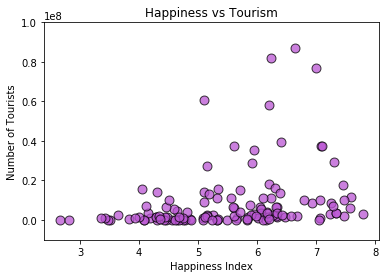

In [4]:
#call the csv file made before

tourism_df = pd.read_csv("Outputs/Tourism_Happiness.csv")
tourism_df = tourism_df.drop("Unnamed: 0", 1)

#make the scatter plot

plt.scatter(tourism_df["Happines Score"], tourism_df["2017"], marker="o", color="mediumorchid", s= 80, edgecolors="black", alpha=0.75)
plt.ylim(-10000000, 100000000)
plt.xlabel("Happiness Index")
plt.ylabel("Number of Tourists")
plt.title("Happiness vs Tourism")
plt.show()

Mariana

# Comparing Countries Happiness Index with Coutries Average Temperature

Does the average temperature of a country affect the country's happiness level? 


In [16]:
#upload csv datasets 
happiness = 'Resources/WorldHappinessReport.csv'
happinessReport=pd.read_csv(happiness)
weather = 'Outputs/WeatherbyCity.csv'
weatherReport=pd.read_csv(weather)


In [14]:
#Happiness
happinessnew= happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()
happinessnew_2017 =happinessnew[happinessnew['year']==2017]
happinessnew_2017=happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()

,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [23]:
#merge weather and happiness together
happy_weather_df = pd.merge(weatherReport, happinessnew_2017, on="Country", how='inner', suffixes=("",""))
happy_weather_df['Temperature'] = pd.to_numeric(happy_weather_df['Temperature'],errors='coerce')
happy_weather_df.drop(columns=['Unnamed: 0']).head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,55.40,2017,2.661718
1,1,Albania,Tirana (Tirane),AL,NaN,2017,4.639548
2,2,Algeria,Algiers,DZ,78.64,2017,5.248912
3,6,Argentina,Buenos Aires,AR,75.83,2017,6.039330
4,7,Armenia,Yerevan,AM,50.00,2017,4.287736


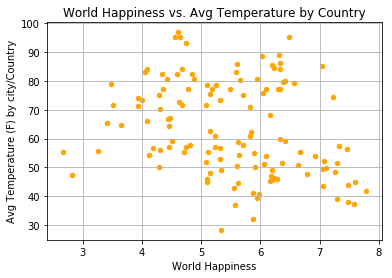

In [27]:
#Plot the correlation between weather and happiness
plt.scatter(happy_weather_df["Life Ladder"], happy_weather_df["Temperature"], c="orange", marker="o", s=20)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.ylabel("Avg Temperature (F) by city/Country")
plt.xlabel("World Happiness")
plt.grid(True)

Sandra

# Comparing countries Happiness Index with the musical choices of their residents.
Does the happines of the country determine the happiness level of the music they choose to listen? 
Does it correlate to the energy, speechinness or instrumentalness of their songs?

In [ ]:
# load datasets
RawSpotifyData = pd.read_csv('Outputs/SpotifyWithFeaturesFinal.csv')
CountryCodeRaw = pd.read_csv('Resources/CountryCodesLookup.csv', encoding="ISO-8859-1")
CountryCodeRaw["region"]=CountryCodeRaw["A2 (ISO)"].str.lower()
CountryCodeRaw["country"]=CountryCodeRaw["COUNTRY"]
#Find CountryName from spotifyData Using the countryLookup file
SpotifyDF=pd.merge(RawSpotifyData,CountryCodeRaw, on="region", how='inner',suffixes=("","") )
#summarize
GroupByDF=RawSpotifyData.groupby(['region'])
MusicProfileRaw=GroupByDF.mean()
#Find CountryName from spotifyData Using the countryLookup file
MusicProfileDF=pd.merge(MusicProfileRaw,CountryCodeRaw, on="region", how='inner',suffixes=("","") )
MusicProfileDF.head(1)

#                                       final data set
#merge with Happiness report
MusicHappinessDF=pd.merge(MusicProfileDF,WHR_DF,on='country', how='inner',suffixes=("","")  )
MusicHappinessDF.columns



In [ ]:
                        #Music happiness is a measure of how positive the songs are

#scatterPlot
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["happiness"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')


plt.xlabel('Happiness Index')
plt.ylabel('Music Happiness')
plt.title("How Happy is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicPositivity.png")
plt.show()

#regression


(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["happiness"])
fit = slope * MusicHappinessDF["happiness"] + intercept
print("Music happiness vs country happiness is not a statistically significant model. R sqr= " + str(r) + ' P-Value= ' + str(p))


                                            #Music Energy
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"],  fmt="o",color= 'g'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music Energy')
plt.title("How energetic is the music of choice vs. the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicEnergy.png")
plt.show()

#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"])
print("Music Energy vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))


                                        #Music Danceability
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"],  fmt="o",color= 'b'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music Danceability')
plt.title("How danceable is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicDanceability.png")
plt.show()


#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"])
print("Music danceability vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))


                                        #Music Speachiness
#scatterPlot
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"],  fmt="o",color= 'y'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')


plt.xlabel('Happiness Index')
plt.ylabel('Music speechiness')
plt.title("How Wordy is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicSpeacheeness.png")
plt.show()


#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"])
print("Music speechiness vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))


                                        # Music instrumentalness
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["instrumentalness"],  fmt="o",color= 'orange'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music instrumentalness')
plt.title("How instrumental is the music of choice vs the country's happiness")
#save the image in the folder
plt.savefig("Graphs/HappinessVsMusicInstrumentalness.png")
plt.show()

#regression
(slope, intercept, r, p, error) = linregress(MusicHappinessDF['Life Ladder'], MusicHappinessDF["instrumentalness"])
print("Music instrumentalness vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))



Side findings:
Do countries have specific music profiles?
What would be the music profile of the US? andd is there a song that fits that exact music profile?

In [ ]:
country='us'

CountryMusicProfileDF=MusicHappinessDF.loc[MusicHappinessDF["region"]==country,:]
CountryMusicProfileDF = CountryMusicProfileDF[["happiness", "energy", "danceability" ,"speechiness" ]]
CountryMusicProfileDF["Category"]=""
CountryMusicProfileDF=CountryMusicProfileDF.set_index("Category")

graph=CountryMusicProfileDF.plot(kind="bar", figsize=(20,3), color=['r','g','b','y'] )
plt.ylabel('% value')
plt.title(country +' Music Profile')
plt.ylim(0,1)

#save the image in the folder
plt.savefig("Graphs/USMusicProfile.png")
plt.show()


CountryMusicProfileDF.head()

In [ ]:
# Can I find a song with this profile?

happinessHigh=int((CountryMusicProfileDF["happiness"]+.03)*100)/100
happinessLow=int((CountryMusicProfileDF["happiness"]-.03)*100)/100


energyHigh=int((CountryMusicProfileDF["energy"]+.03)*100)/100
energyLow=int((CountryMusicProfileDF["energy"]-.03)*100)/100



danceabilityHigh=int((CountryMusicProfileDF["danceability"]+.03)*100)/100
danceabilityLow=int((CountryMusicProfileDF["danceability"]-.03)*100)/100



speechinessHigh=int((CountryMusicProfileDF["speechiness"]+.03)*100)/100
speechinessLow=int((CountryMusicProfileDF["speechiness"]-.03)*100)/100



FindSong=RawSpotifyData.loc[(RawSpotifyData["happiness"]>happinessLow) 
                            &(RawSpotifyData["happiness"]<happinessHigh) 
                            &(RawSpotifyData["energy"]>energyLow) 
                            &(RawSpotifyData["energy"]<energyHigh) 
                            &(RawSpotifyData["danceability"]>danceabilityLow) 
                            &(RawSpotifyData["danceability"]<danceabilityHigh) 
                            &(RawSpotifyData["speechiness"]>speechinessLow) 
                            &(RawSpotifyData["speechiness"]<speechinessHigh) 
                            
                            
                            
                            
                            
                            
                            ,:] 
FindSong["Track Name"].head(1)

https://www.youtube.com/watch?v=c73Cu3TQnlg